In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
df = pd.DataFrame({'a': [1,2,3], 'b': ['aaa','bbb','ccc']})
df

,a,b
0,1,aaa
1,2,bbb
2,3,ccc


In [19]:
templat = 'df has {} rows and {} columns'
df_shape= templat.format(df.shape[0],df.shape[1])

In [11]:
df.shape

(3, 2)

In [16]:
df_shape_f = f'df has {df.shape[0]} rows and {df.shape[1]} columns'
df_shape_f

'df has 3 rows and 2 columns'

In [22]:
df_1 = pd.DataFrame({'a': [1,np.nan,3], 'b': [np.nan,np.nan,'ccc']})
df_1

,a,b
0,1.0,NaN
1,NaN,NaN
2,3.0,ccc


In [24]:
df_1.isna().sum()

a    1
b    2
dtype: int64

In [28]:
lessson_1_dir = os.listdir('/Users/ALEXEY/#KARPOV.CURSES/Lesson 1')

In [31]:
for path, dirs, files in os.walk('/Users/ALEXEY/#KARPOV.CURSES/Lesson 1'):
    print(files)

['2_taxi_nyc.csv', 'homework_2.ipynb', 'homework_3.ipynb', 'homework_4.ipynb', 'Lesson 1.ipynb', 'lesson_1_data.csv', 'Lesson_2.ipynb', 'lesson_3.ipynb', 'lesson_3_data__1_.csv', 'lesson_4.ipynb', 'mini_project_1.ipynb', 'mini_project_2.ipynb']
['homework_2-checkpoint.ipynb', 'homework_3-checkpoint.ipynb', 'homework_4-checkpoint.ipynb', 'Lesson 1-checkpoint.ipynb', 'Lesson_2-checkpoint.ipynb', 'lesson_3-checkpoint.ipynb', 'lesson_4-checkpoint.ipynb', 'mini_project_1-checkpoint.ipynb', 'mini_project_2-checkpoint.ipynb']


In [57]:
df_types = df.dtypes


In [84]:
df['age'] = '1','2','3'

In [56]:
df = df.astype({'age': 'int64'})


In [85]:
df['sex'] = '1','2','3'

In [60]:
df = df.drop(columns=['age','sex'])

In [70]:
df.drop(columns=['age','sex'], inplace=True)

In [86]:
df

,a,b,age,sex
0,1,aaa,1,1
1,2,bbb,2,2
2,3,ccc,3,3


In [87]:
df['client_id'] = 1,1,1

In [88]:
df = df.drop_duplicates(subset=['client_id'], keep='last')
df

,a,b,age,sex,client_id
2,3,ccc,3,3,1


In [3]:
numbers = [1, -2, 1, 3, 2, 4, 5, 7, 103, 0, -3, 2]
positive_numbers=[]
for i in numbers:
    if i == 0:
        break
    else:
        positive_numbers.append(i)
print(positive_numbers)

[1, -2, 1, 3, 2, 4, 5, 7, 103]


# Загрузить и распарстить
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). 

In [39]:
#Вариант 1: при загрузке dataframe использовать parse_dates (необходимо знать точно, что эти колонки - дата)
taxi = pd.read_csv('taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [27]:
#Вариант 2: исользовать  pd.to_datetime для каждого столбца
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])


In [28]:
#Вариант 3: применить к колонкам метод .apply(pd.to_datetime)
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)

#### Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type)

In [40]:
taxi = taxi.query('start_type == "asap" or start_type== "reserved"')

# Создание колонки + перевод времени
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')


In [41]:
#Получить разницу между датами и переведем в минуты
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

## Отфильтровать и сгруппировать
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [51]:
taxi.query('start_type == "reserved" and wait_time > 0.0') \
    .groupby('driver_id', as_index=False) \
    .agg({'start_type': 'count'}) \
    .max()

driver_id     ff5c924e0b630fd7c019a4234059fdf4
start_type                                  67
dtype: object

### Подумайте, что может влиять на число опозданий из прошлого задания

## Добавьте столбец 
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 


In [65]:
#вариант 1
taxi['month'] = pd.DatetimeIndex(taxi['start_at']).month

In [67]:
#вариант 2
taxi['month'] = taxi.start_at.dt.month

In [57]:
#вариант 1
taxi['weekday'] = pd.DatetimeIndex(taxi['start_at']).day_name()

In [69]:
#вариант 2
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
23106    Saturday
23107    Saturday
23108     Tuesday
23109    Thursday
23110     Tuesday
Name: start_at, Length: 23091, dtype: object

## Постройте график числа заказов по месяцам (month).
Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 


In [70]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


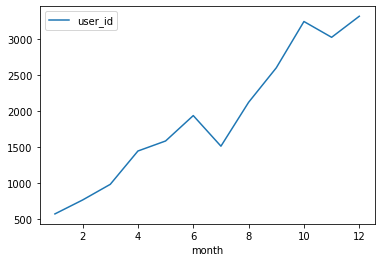

In [85]:
taxi_per_month = taxi.groupby('month').agg({'user_id': 'count'}).plot()

C:\Users\ALEXEY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


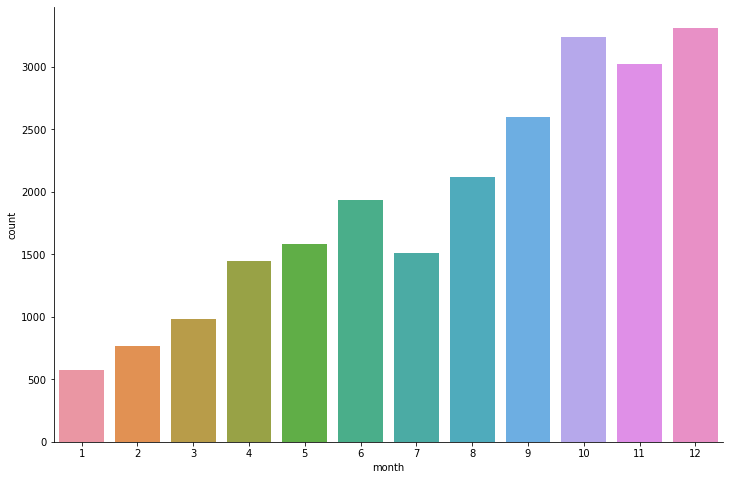

In [94]:
plt.figure(figsize=(12,8))
ax = sns.countplot(taxi.month)
sns.despine()

## график по дням недели (weekday).
Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?

C:\Users\ALEXEY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

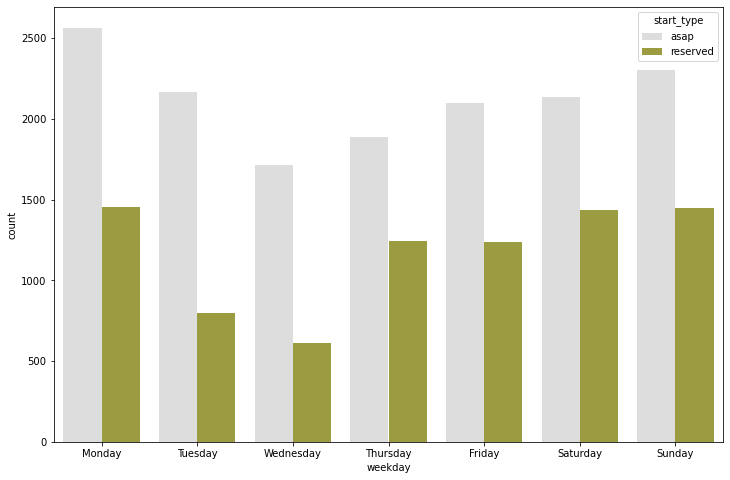

In [109]:
plt.figure(figsize=(12,8))
sns.countplot('weekday', data=taxi, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], \
             hue='start_type', palette=['#dddddd','#aaaa33'])
sns.despine

## Постройте график MAU
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.

In [116]:
#.agg({'user_id': lambda series: series.nunique()})
mau=(
    taxi.groupby('month') \
    .agg({'user_id': pd.Series.nunique})
)

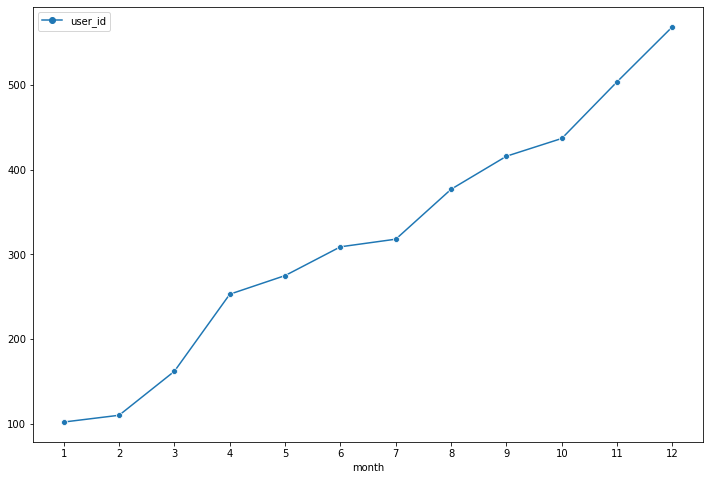

In [129]:
plt.figure(figsize=(12,8))
sns.lineplot(data = mau, markers='o')
plt.xticks(xticks);
 
#mau.plot(figsize=(12,8))

In [125]:
xticks = range(1,13)